<a href="https://colab.research.google.com/github/abidur0177/Convolutional_Neural_Network/blob/main/Cat_Dog_Classification_With_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this project I have defined a convolutional neural network to distinguish between cat and dog images. This is a binary classification task in nature and the dataset is much larger than the horse_or_human classification.

### First import some basic libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Download the cats and dogs images with 3000 samples where 2000 will be allocated for training and 1000 will be for testing.

In [3]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-05-01 21:00:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.207, 142.251.163.207, 142.251.167.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   126MB/s    in 0.5s    

2024-05-01 21:00:44 (126 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



### Unzip the file to a folder

In [4]:
import zipfile

local_zip = '/content/cats_and_dogs_filtered.zip'
ref_zip = zipfile.ZipFile(local_zip, 'r')
ref_zip.extractall()
ref_zip.close()

### Lets look at the directories inside the base directory

In [5]:
import os

base_dir = '/content/cats_and_dogs_filtered'

print(f'Sub directories of base directory: {os.listdir(base_dir)}')

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

print('Sub directories of train directory:', os.listdir(train_dir))
print('Sub directories of validation directory:', os.listdir(val_dir))

train_cat_dir = os.path.join(train_dir,'cats')
train_dog_dir = os.path.join(train_dir,'dogs')
val_cat_dir = os.path.join(val_dir,'cats')
val_dog_dir = os.path.join(val_dir,'dogs')

print('Number of cat samples in train directory: ', len(os.listdir(train_cat_dir)))
print('Number of dog samples in train directory: ', len(os.listdir(train_dog_dir)))
print('Number of cat samples in validation directory: ', len(os.listdir(val_cat_dir)))
print('Number of dog samples in validation directory: ', len(os.listdir(val_dog_dir)))

Sub directories of base directory: ['train', 'vectorize.py', 'validation']
Sub directories of train directory: ['cats', 'dogs']
Sub directories of validation directory: ['cats', 'dogs']
Number of cat samples in train directory:  1000
Number of dog samples in train directory:  1000
Number of cat samples in validation directory:  500
Number of dog samples in validation directory:  500


### Print some of the sample files from every directory.

In [6]:
train_cat_names = os.listdir(train_cat_dir)
train_dog_names = os.listdir(train_dog_dir)
val_cat_names = os.listdir(val_cat_dir)
val_dog_names = os.listdir(val_dog_dir)

print(f'Train Cats: {train_cat_names[:5]}')
print(f'Train dogs: {train_dog_names[:5]}')
print(f'Validation Cats: {val_cat_names[:5]}')
print(f'Validation Cats: {val_dog_names[:5]}')

Train Cats: ['cat.88.jpg', 'cat.301.jpg', 'cat.626.jpg', 'cat.290.jpg', 'cat.54.jpg']
Train dogs: ['dog.574.jpg', 'dog.163.jpg', 'dog.149.jpg', 'dog.174.jpg', 'dog.615.jpg']
Validation Cats: ['cat.2217.jpg', 'cat.2154.jpg', 'cat.2479.jpg', 'cat.2156.jpg', 'cat.2041.jpg']
Validation Cats: ['dog.2072.jpg', 'dog.2339.jpg', 'dog.2438.jpg', 'dog.2259.jpg', 'dog.2073.jpg']


### Lets look at some of the images from both class

/bin/bash: line 1: matplotlib: command not found


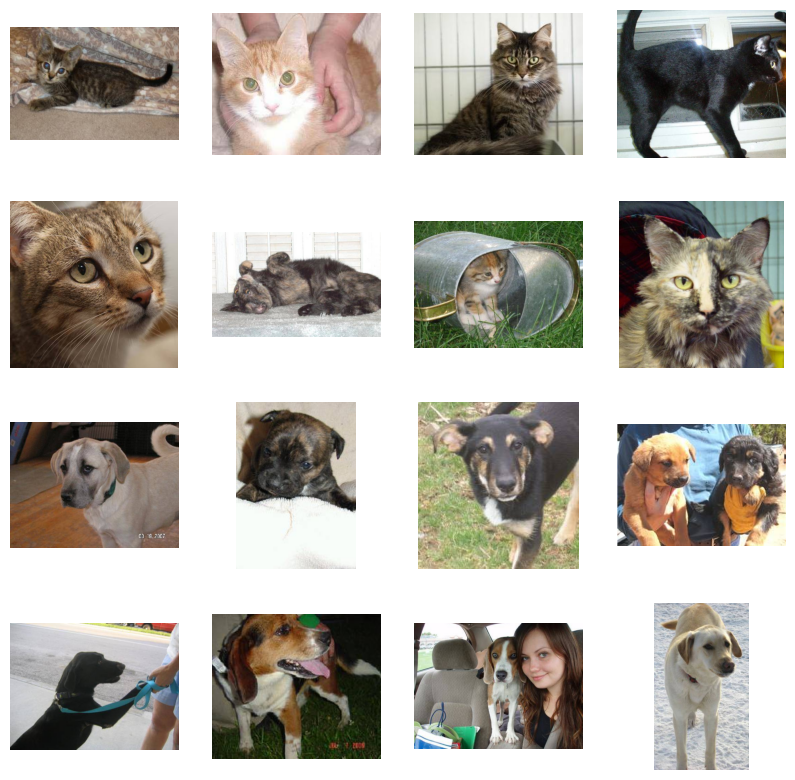

In [7]:
!matplotlib inline
import matplotlib.image as mping

n_rows = 4
n_cols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(n_cols*2.5, n_rows*2.5)

cat_pics = [os.path.join(train_cat_dir, fname) for fname in train_cat_names[pic_index:pic_index+8]]
dog_pics = [os.path.join(train_dog_dir,fname) for fname in train_dog_names[pic_index:pic_index+8]]

for i, image_path in enumerate(cat_pics+dog_pics):
  sp = plt.subplot(n_cols, n_rows, i+1)
  sp.axis('off')
  img = mping.imread(image_path)
  plt.imshow(img)

plt.show()

### Define the model and compile with RMSprop

In [19]:
from keras.optimizers import RMSprop

def my_model(conv1,conv2,conv3, pool1,pool2,pool3,dense1,dense2):
  model = keras.models.Sequential([
      #First convolution layer
      keras.layers.Conv2D(conv1['No of filters'], conv1['Size of filters'],
                          activation=tf.nn.relu, input_shape=(150,150,3)),
      #First pooling layer
      keras.layers.MaxPool2D(pool1['Size']),
      #Second convolution layer
      keras.layers.Conv2D(conv1['No of filters'], conv1['Size of filters'],
                          activation=tf.nn.relu, input_shape=(150,150,3)),
      #Second pooling layer
      keras.layers.MaxPool2D(pool1['Size']),
      #Third convolution layer
      keras.layers.Conv2D(conv1['No of filters'], conv1['Size of filters'],
                          activation=tf.nn.relu, input_shape=(150,150,3)),
      #Third pooling layer
      keras.layers.MaxPool2D(pool1['Size']),
      #Flatten layer
      keras.layers.Flatten(),
      #First dense layer
      keras.layers.Dense(dense1['No of neurons'], activation=tf.nn.relu),
      #Output layer
      keras.layers.Dense(dense2['No of neurons'], activation=tf.nn.sigmoid)
  ])

  model_compile = model.compile(
      loss=tf.keras.losses.BinaryCrossentropy(),
      optimizer=RMSprop(learning_rate=0.001),
      metrics=keras.metrics.Accuracy())

  return model, model_compile

In [32]:
conv1 = {
    "No of filters": 16,
    "Size of filters": (3,3)
}

conv2 = {
    "No of filters": 32,
    "Size of filters": (3,3)
}

conv3 = {
    "No of filters": 32,
    "Size of filters": (3,3)
}

pool1 = {
    "Size": (2,2)
}

pool2 = {
    "Size": (2,2)
}

pool3 = {
    "Size": (2,2)
}

dense1 = {
    "No of neurons": 512
}

dense2 = {
    "No of neurons": 1
}

model, model_compile = my_model(conv1, conv2, conv3, pool1, pool2 ,pool3, dense1, dense2)

In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 16)        2320      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 36, 36, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 34, 34, 16)        2320      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 17, 17, 16)       

### Preprocess the images with ImageDataGenerator

In [34]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1.0/255)
validation_gen = ImageDataGenerator(rescale=1.0/255)

#Flow of traning image in batches of 20 from the train directory
train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

#Flow of traning image in batches of 20 from the validation directory
validation_generator = train_gen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Train the model with the training data for 15 epochs

In [35]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    verbose=2
)

Epoch 1/5
100/100 - 35s - loss: 0.7160 - accuracy: 0.0000e+00 - val_loss: 0.6724 - val_accuracy: 0.0000e+00 - 35s/epoch - 354ms/step
Epoch 2/5
100/100 - 33s - loss: 0.6374 - accuracy: 0.0000e+00 - val_loss: 0.6069 - val_accuracy: 0.0000e+00 - 33s/epoch - 331ms/step
Epoch 3/5
100/100 - 33s - loss: 0.5745 - accuracy: 0.0000e+00 - val_loss: 0.5680 - val_accuracy: 0.0000e+00 - 33s/epoch - 331ms/step
Epoch 4/5
100/100 - 32s - loss: 0.5052 - accuracy: 0.0000e+00 - val_loss: 0.6310 - val_accuracy: 0.0000e+00 - 32s/epoch - 319ms/step
Epoch 5/5
100/100 - 34s - loss: 0.4532 - accuracy: 0.0000e+00 - val_loss: 0.5832 - val_accuracy: 0.0000e+00 - 34s/epoch - 341ms/step


### Model Prediction

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

### Visualizing Intermediate Representations

1/1 [==============================] - 0s 196ms/step


<ipython-input-37-b353d4b7bb1c>:48: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()
<ipython-input-37-b353d4b7bb1c>:51: RuntimeWarning: invalid value encountered in cast
  x  = np.clip(x, 0, 255).astype('uint8')


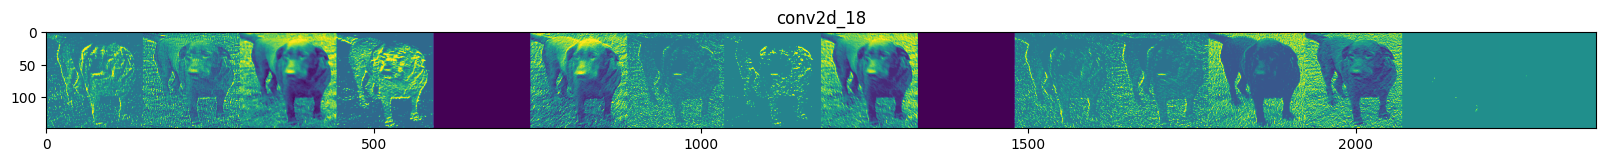

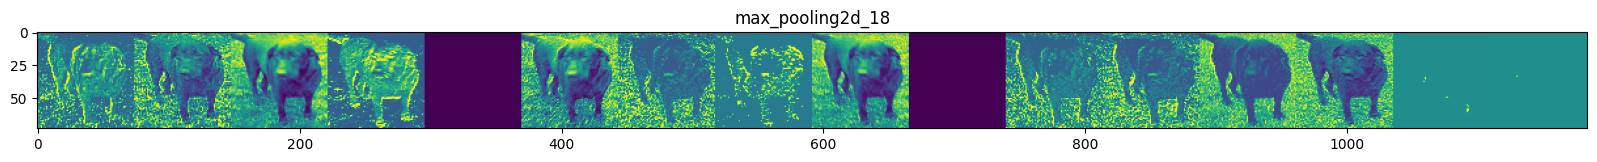

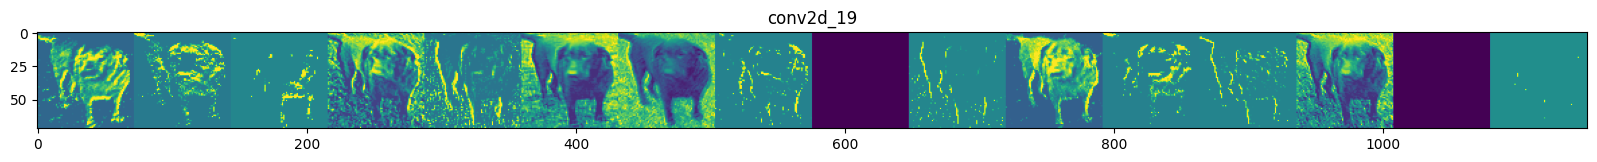

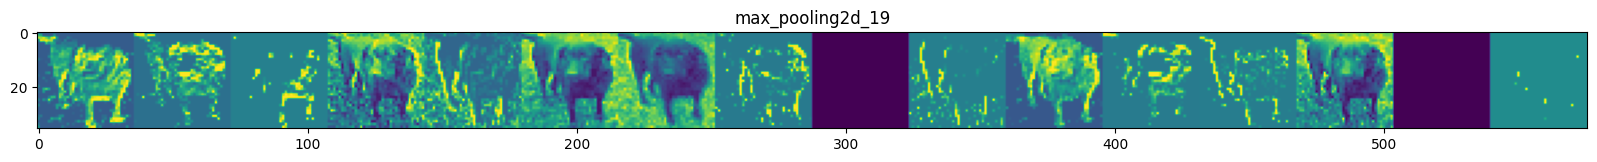

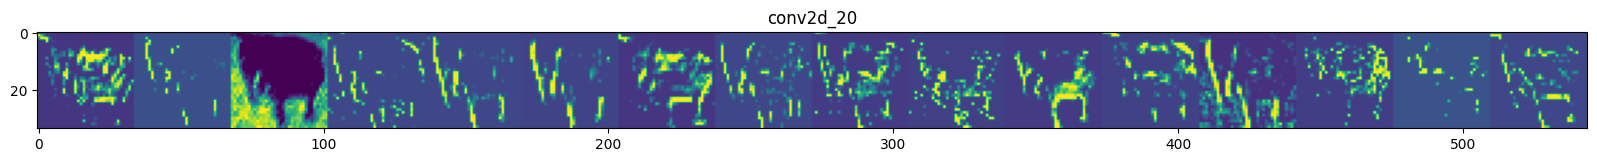

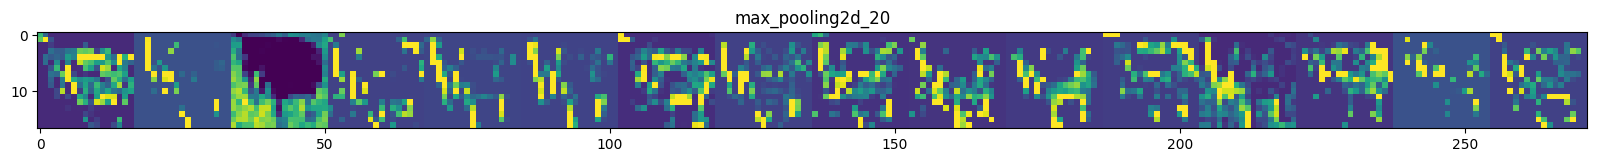

In [37]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cat_dir, f) for f in train_cat_names]
dog_img_files = [os.path.join(train_dog_dir, f) for f in train_dog_names]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

### Evaluate accuracy and loss of the model

Text(0.5, 1.0, 'Training and validation loss')

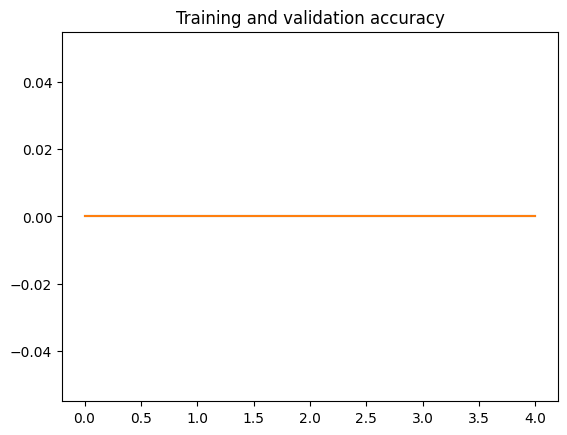

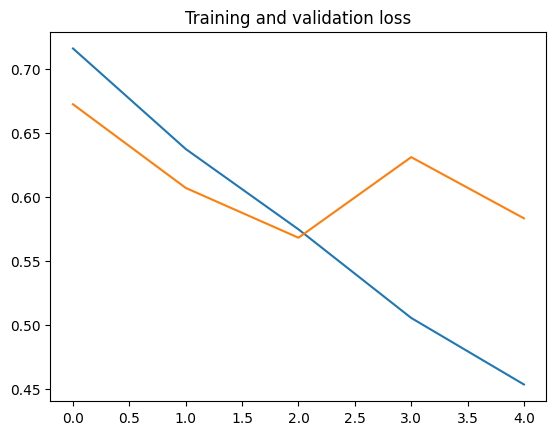

In [38]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

### Clean up

In [ ]:
import os, signal

os.kill(os.getpid(), signal.SIGKILL)